In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('dataset/data_pelanggan.csv')
df.head()

,CLIENTNUM,idstatus,Customer_Age,Gender,Dependent_count,Educationid,Maritalid,Income_Category,card_categoryid,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Churn
0,768805383,1,45,M,3,1,1,Rp 5.000.000 - Rp 8.000.000,1,39,5,1,3,12691000.0,777000,11914000.0,1144000,42,0.061,no
1,818770008,1,49,F,5,2,2,< Rp 3.000.000,1,44,6,1,2,8256000.0,864000,7392000.0,1291000,33,0.105,no
2,713982108,1,51,M,3,2,1,Rp 8.000.000 - Rp 15.000.000,1,36,4,1,0,3418000.0,0,3418000.0,1887000,20,0.000,no
3,769911858,1,40,F,4,1,3,< Rp 3.000.000,1,34,3,4,1,3313000.0,2517000,796000.0,1171000,20,0.760,yes
4,709106358,1,40,M,3,3,1,Rp 5.000.000 - Rp 8.000.000,1,21,5,1,0,4716000.0,0,4716000.0,816000,28,0.000,no


In [3]:
df.shape

(10127, 20)

## data preprocessing

In [4]:
df.isna().sum()

CLIENTNUM                   0
idstatus                    0
Customer_Age                0
Gender                      0
Dependent_count             0
Educationid                 0
Maritalid                   0
Income_Category             0
card_categoryid             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
Churn                       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Educationid               10127 non-null  int64  
 6   Maritalid                 10127 non-null  int64  
 7   Income_Category           10127 non-null  object 
 8   card_categoryid           10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.describe()

,CLIENTNUM,idstatus,Customer_Age,Dependent_count,Educationid,Maritalid,card_categoryid,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000
mean,7.391776e+08,1.160660,46.325960,2.346203,2.974622,1.463415,1.126987,35.928409,3.812580,2.341167,2.455317,8.631954e+06,1.162814e+06,7.469140e+06,4.404086e+06,64.858695,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,1.680730,0.737808,0.482019,7.986416,1.554408,1.010622,1.106225,9.088777e+06,8.149873e+05,9.090685e+06,3.397129e+06,23.472570,0.275691
min,7.080821e+08,1.000000,26.000000,0.000000,1.000000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1.438300e+06,0.000000e+00,3.000000e+03,5.100000e+05,10.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,1.000000,2.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2.555000e+06,3.590000e+05,1.324500e+06,2.155500e+06,45.000000,0.023000
50%,7.179264e+08,1.000000,46.000000,2.000000,2.000000,1.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4.549000e+06,1.276000e+06,3.474000e+06,3.899000e+06,67.000000,0.176000
75%,7.731435e+08,1.000000,52.000000,3.000000,4.000000,2.000000,1.000000,40.000000,5.000000,3.000000,3.000000,1.106750e+07,1.784000e+06,9.859000e+06,4.741000e+06,81.000000,0.503000
max,8.283431e+08,2.000000,73.000000,5.000000,7.000000,3.000000,4.000000,56.000000,6.000000,6.000000,6.000000,3.451600e+07,2.517000e+06,3.451600e+07,1.848400e+07,139.000000,0.999000


In [8]:
df['idstatus'].value_counts()

1    8500
2    1627
Name: idstatus, dtype: int64

In [9]:
# mengganti nilai pada idstatus yang disesuaikan dengan status dari customer itu sendiri
def statusid(nilai):
    if nilai==1:
        return "Normal"
    elif nilai==2:
        return "Gold"
    elif nilai==3:
        return "Silver"
    elif nilai==4:
        return "Platinum"
    else:
        return "Not Member"

df['idstatus'] = df['idstatus'].apply(statusid)
df['idstatus']

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
10122    Normal
10123      Gold
10124      Gold
10125      Gold
10126      Gold
Name: idstatus, Length: 10127, dtype: object

In [10]:
# mengganti nilai education
def educationid(edukasi):
    if edukasi == 1:
        return "High School"
    elif edukasi == 2:
        return "Graduate"
    elif edukasi == 3:
        return "Uneducated"
    elif edukasi == 4:
        return "Unknown"
    elif edukasi == 5:
        return "College"
    elif edukasi == 6:
        return "Post Graduate"
    elif edukasi == 7:
        return "Doctorate"
    else:
        return "tidak Terdaftar"
df['Educationid'] = df['Educationid'].apply(educationid)
df["Educationid"]

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Educationid, Length: 10127, dtype: object

In [11]:
df["Educationid"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post Graduate     516
Doctorate         451
Name: Educationid, dtype: int64

In [12]:
df['Maritalid'].value_counts()

1    4687
2    3943
3     749
0     748
Name: Maritalid, dtype: int64

In [13]:
def maritalid(marital):
    if marital==1:
        return "Married"
    elif marital == 2:
        return "Single"
    elif marital == 3:
        return "Unknown"
    elif marital == 4:
        return "Divorced"
    else:
        return "salah"
df["Maritalid"] = df["Maritalid"].apply(maritalid)

In [14]:
print(df["Maritalid"].value_counts())

Married    4687
Single     3943
Unknown     749
salah       748
Name: Maritalid, dtype: int64


In [16]:
df["card_categoryid"].value_counts()

1    9436
3     555
2     116
4      20
Name: card_categoryid, dtype: int64

In [18]:
df['card_categoryid'] = df['card_categoryid'].apply(lambda x: 'Blue' if x == 1 else ('Gold' if x == 2 else ('Silver' if x == 3 else ('Platinum' if x == 4 else x))))
print(df['card_categoryid'].value_counts())

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_categoryid, dtype: int64


In [19]:
df

,CLIENTNUM,idstatus,Customer_Age,Gender,Dependent_count,Educationid,Maritalid,Income_Category,card_categoryid,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Churn
0,768805383,Normal,45,M,3,High School,Married,Rp 5.000.000 - Rp 8.000.000,Blue,39,5,1,3,12691000.0,777000,11914000.0,1144000,42,0.061,no
1,818770008,Normal,49,F,5,Graduate,Single,< Rp 3.000.000,Blue,44,6,1,2,8256000.0,864000,7392000.0,1291000,33,0.105,no
2,713982108,Normal,51,M,3,Graduate,Married,Rp 8.000.000 - Rp 15.000.000,Blue,36,4,1,0,3418000.0,0,3418000.0,1887000,20,0.000,no
3,769911858,Normal,40,F,4,High School,Unknown,< Rp 3.000.000,Blue,34,3,4,1,3313000.0,2517000,796000.0,1171000,20,0.760,yes
4,709106358,Normal,40,M,3,Uneducated,Married,Rp 5.000.000 - Rp 8.000.000,Blue,21,5,1,0,4716000.0,0,4716000.0,816000,28,0.000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Normal,50,M,2,Graduate,Single,Rp 3.000.000 - Rp 5.000.000,Blue,40,3,2,3,4003000.0,1851000,2152000.0,15476000,117,0.462,no
10123,710638233,Gold,41,M,2,Unknown,salah,Rp 3.000.000 - Rp 5.000.000,Blue,25,4,2,3,4277000.0,2186000,2091000.0,8764000,69,0.511,no
10124,716506083,Gold,44,F,1,High School,Married,< Rp 3.000.000,Blue,36,5,3,4,5409000.0,0,5409000.0,10291000,60,0.000,no
10125,717406983,Gold,30,M,2,Graduate,Unknown,Rp 3.000.000 - Rp 5.000.000,Blue,36,4,3,3,5281000.0,0,5281000.0,8395000,62,0.000,no


## Exploratory Data Analysis (EDA)

In [20]:
# statistik deskriptif
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8.631954e+06,1.162814e+06,7.469140e+06,4.404086e+06,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9.088777e+06,8.149873e+05,9.090685e+06,3.397129e+06,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1.438300e+06,0.000000e+00,3.000000e+03,5.100000e+05,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2.555000e+06,3.590000e+05,1.324500e+06,2.155500e+06,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4.549000e+06,1.276000e+06,3.474000e+06,3.899000e+06,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,1.106750e+07,1.784000e+06,9.859000e+06,4.741000e+06,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,3.451600e+07,2.517000e+06,3.451600e+07,1.848400e+07,139.000000,0.999000


In [21]:
# informasi data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Educationid               10127 non-null  object 
 6   Maritalid                 10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   card_categoryid           10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [22]:
frekuensi_gender = df['Gender'].value_counts()
print(frekuensi_gender)

F    5358
M    4769
Name: Gender, dtype: int64


In [23]:
from scipy.stats import ttest_ind, pearsonr

In [24]:
# Uji Hipotesis
hasil_uji = ttest_ind(df[df['Churn'] == 'yes']['Customer_Age'], df[df['Churn'] == 'no']['Customer_Age'])
print("P-value dari uji hipotesis: ", hasil_uji.pvalue)


P-value dari uji hipotesis:  4.156303823326032e-15


In [25]:
# Korelasi
korelasi = df.corr()

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_11888\310317709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df.corr()


<Axes: >

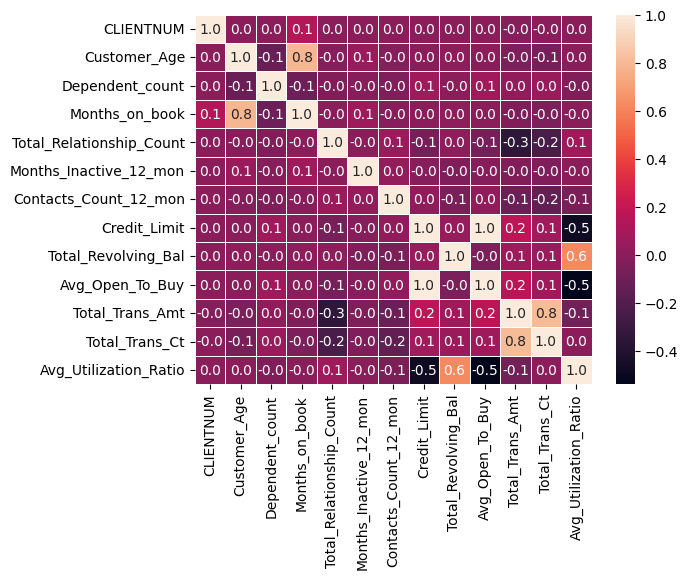

In [26]:
sns.heatmap(korelasi, annot=True, fmt=".1f", linewidths=.5)

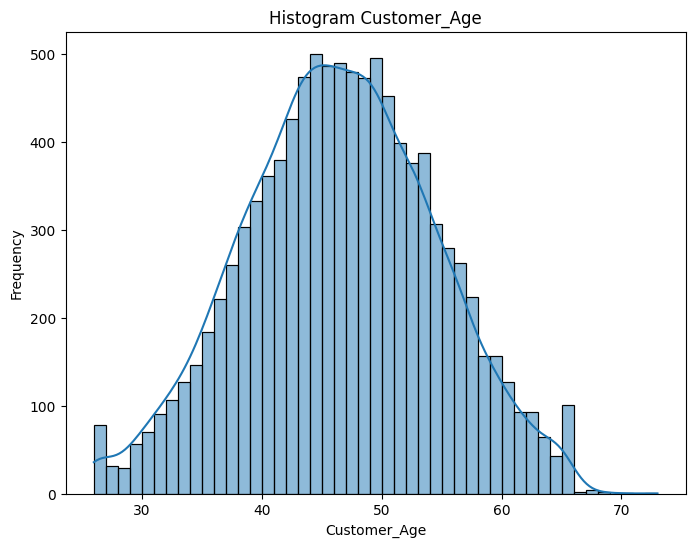

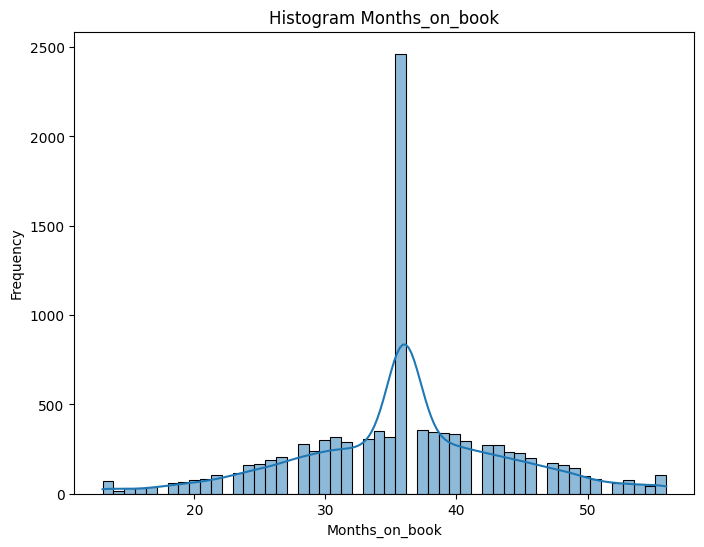

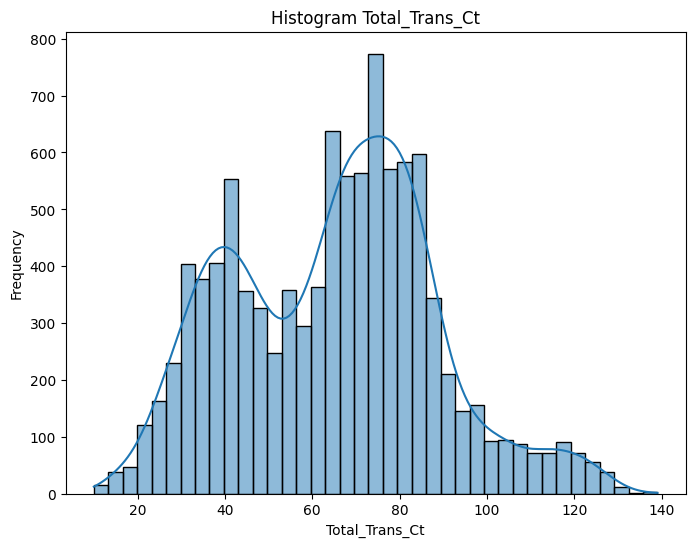

In [27]:
import matplotlib.pyplot as plt
numerik = ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct']
for col in numerik:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [37]:
df['Months_on_book'].value_counts(bins=10)

(34.5, 38.8]                  3485
(38.8, 43.1]                  1515
(30.2, 34.5]                  1265
(25.9, 30.2]                  1208
(43.1, 47.4]                   825
(21.6, 25.9]                   546
(47.4, 51.7]                   479
(51.7, 56.0]                   338
(17.3, 21.6]                   278
(12.956000000000001, 17.3]     188
Name: Months_on_book, dtype: int64

In [40]:
df['Customer_Age'].value_counts(bins=10)

(44.8, 49.5]                  2422
(49.5, 54.2]                  1920
(40.1, 44.8]                  1778
(35.4, 40.1]                  1478
(54.2, 58.9]                   921
(30.7, 35.4]                   654
(58.9, 63.6]                   535
(25.951999999999998, 30.7]     265
(63.6, 68.3]                   152
(68.3, 73.0]                     2
Name: Customer_Age, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   idstatus                  10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Educationid               10127 non-null  object 
 6   Maritalid                 10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   card_categoryid           10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

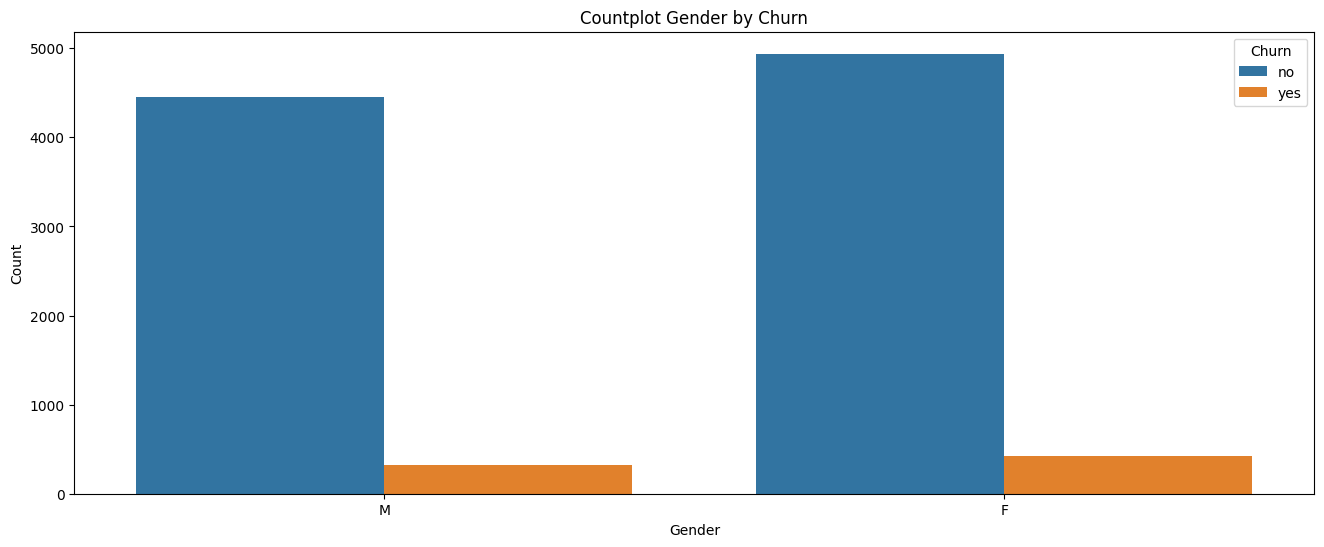

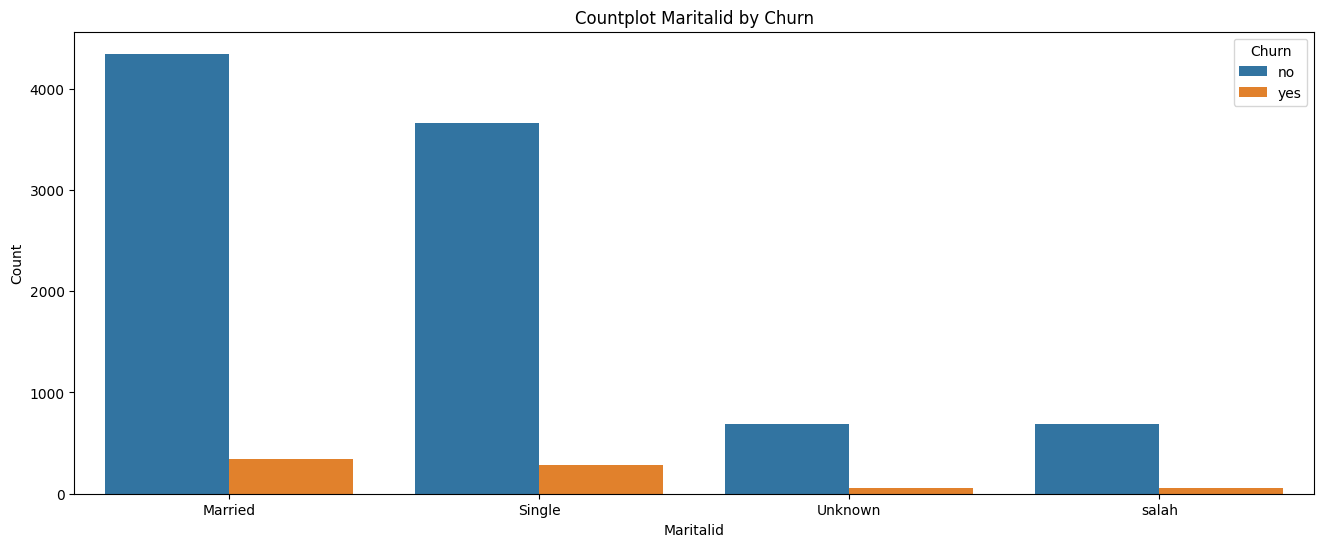

In [56]:
#barplot untuk variabel kategorikal

kategorikal = ['Gender',"Maritalid"]
for col in kategorikal:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Countplot {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

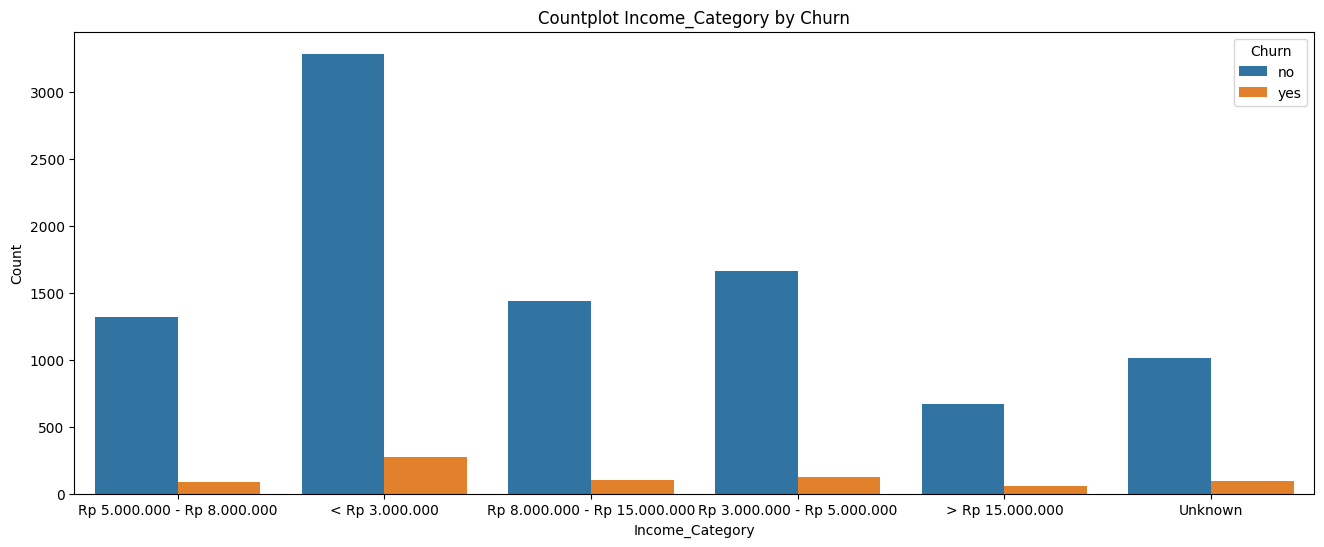

In [54]:
kategorikal = ['Income_Category']
for col in kategorikal:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Countplot {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [57]:
# Korelasi antara variabel numerik dan kategorikal
for col in numerik:
    for cat_col in kategorikal:
        if col != cat_col:
            print(f"Korelasi antara {col} dan {cat_col}:")
            print(df.groupby(cat_col)[col].mean())

Korelasi antara Customer_Age dan Gender:
Gender
F    46.456887
M    46.178863
Name: Customer_Age, dtype: float64
Korelasi antara Customer_Age dan Maritalid:
Maritalid
Married    46.735012
Single     46.213036
Unknown    45.568758
salah      45.116310
Name: Customer_Age, dtype: float64
Korelasi antara Months_on_book dan Gender:
Gender
F    35.979097
M    35.871462
Name: Months_on_book, dtype: float64
Korelasi antara Months_on_book dan Maritalid:
Maritalid
Married    36.213996
Single     35.877758
Unknown    35.189586
salah      35.145722
Name: Months_on_book, dtype: float64
Korelasi antara Total_Trans_Ct dan Gender:
Gender
F    66.352370
M    63.180541
Name: Total_Trans_Ct, dtype: float64
Korelasi antara Total_Trans_Ct dan Maritalid:
Maritalid
Married    61.725411
Single     67.756531
Unknown    67.146862
salah      66.925134
Name: Total_Trans_Ct, dtype: float64


In [58]:
# Hubungan antara variabel kategorikal
for col1 in kategorikal:
    for col2 in kategorikal:
        if col1 != col2:
            print(f"Keterhubungan antara {col1} dan {col2}:")
            print(pd.crosstab(df[col1], df[col2], margins=True))

Keterhubungan antara Gender dan Maritalid:
Maritalid  Married  Single  Unknown  salah    All
Gender                                           
F             2451    2125      380    402   5358
M             2236    1818      369    346   4769
All           4687    3943      749    748  10127
Keterhubungan antara Maritalid dan Gender:
Gender        F     M    All
Maritalid                   
Married    2451  2236   4687
Single     2125  1818   3943
Unknown     380   369    749
salah       402   346    748
All        5358  4769  10127


In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [60]:
df

,CLIENTNUM,idstatus,Customer_Age,Gender,Dependent_count,Educationid,Maritalid,Income_Category,card_categoryid,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Churn
0,768805383,Normal,45,M,3,High School,Married,Rp 5.000.000 - Rp 8.000.000,Blue,39,5,1,3,12691000.0,777000,11914000.0,1144000,42,0.061,no
1,818770008,Normal,49,F,5,Graduate,Single,< Rp 3.000.000,Blue,44,6,1,2,8256000.0,864000,7392000.0,1291000,33,0.105,no
2,713982108,Normal,51,M,3,Graduate,Married,Rp 8.000.000 - Rp 15.000.000,Blue,36,4,1,0,3418000.0,0,3418000.0,1887000,20,0.000,no
3,769911858,Normal,40,F,4,High School,Unknown,< Rp 3.000.000,Blue,34,3,4,1,3313000.0,2517000,796000.0,1171000,20,0.760,yes
4,709106358,Normal,40,M,3,Uneducated,Married,Rp 5.000.000 - Rp 8.000.000,Blue,21,5,1,0,4716000.0,0,4716000.0,816000,28,0.000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Normal,50,M,2,Graduate,Single,Rp 3.000.000 - Rp 5.000.000,Blue,40,3,2,3,4003000.0,1851000,2152000.0,15476000,117,0.462,no
10123,710638233,Gold,41,M,2,Unknown,salah,Rp 3.000.000 - Rp 5.000.000,Blue,25,4,2,3,4277000.0,2186000,2091000.0,8764000,69,0.511,no
10124,716506083,Gold,44,F,1,High School,Married,< Rp 3.000.000,Blue,36,5,3,4,5409000.0,0,5409000.0,10291000,60,0.000,no
10125,717406983,Gold,30,M,2,Graduate,Unknown,Rp 3.000.000 - Rp 5.000.000,Blue,36,4,3,3,5281000.0,0,5281000.0,8395000,62,0.000,no


In [63]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df['Educationid'] = label_encoder.fit_transform(df['Educationid'])
df['Maritalid'] = label_encoder.fit_transform(df['Maritalid'])
df['card_categoryid'] = label_encoder.fit_transform(df['card_categoryid'])



In [66]:
# Bagi data menjadi subset pelatihan dan pengujian
X = df.drop(columns=['Churn', 'CLIENTNUM','idstatus' ])
y = df['Churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [70]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [72]:
param_grid = {
    'clf_penalty' : ['11', '12'],
    'clf__C' : [0.001, 0.01, 0.1, 1, 10]
}

In [74]:
# GridSearchCV untuk mencari parameter terbaik dengan cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring='accuracy')

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
# Evaluasi kinerja model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.928923988153998

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2823
           1       0.00      0.00      0.00       216

    accuracy                           0.93      3039
   macro avg       0.46      0.50      0.48      3039
weighted avg       0.86      0.93      0.89      3039



c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

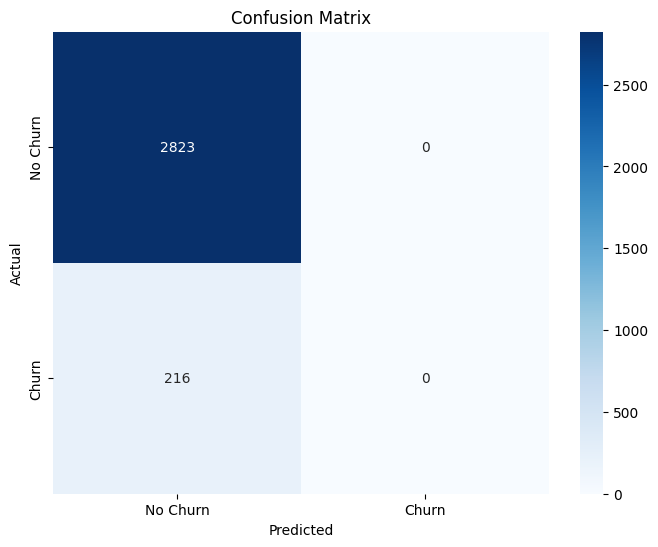

In [82]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()